In [29]:
import pandas as pd
import random
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [30]:
state_categories = pd.read_csv('RESULTS/STATE_CATEGORIES.csv')
state_categories = state_categories.set_index('STATE')

state_gdf = gpd.read_file('RESULTS/us_states/cb_2018_us_state_500k.shp')
state_gdf = state_gdf[['NAME', 'geometry']]
state_gdf = state_gdf.rename({'NAME': 'STATE'}, axis=1)

In [31]:
state_gdf = state_gdf.join(state_categories, on='STATE', how='inner')

In [32]:
categories = state_gdf['CATEGORY'].unique()

# Generate random colors for each category
category_colors = {}
for category in categories:
    red = random.randint(0, 255)
    green = random.randint(0, 255)
    blue = random.randint(0, 255)
    category_colors[category] = (red / 255, green / 255, blue / 255)  # Normalizing values for Matplotlib

/home/tkbischoff/venvs/deep_learning/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


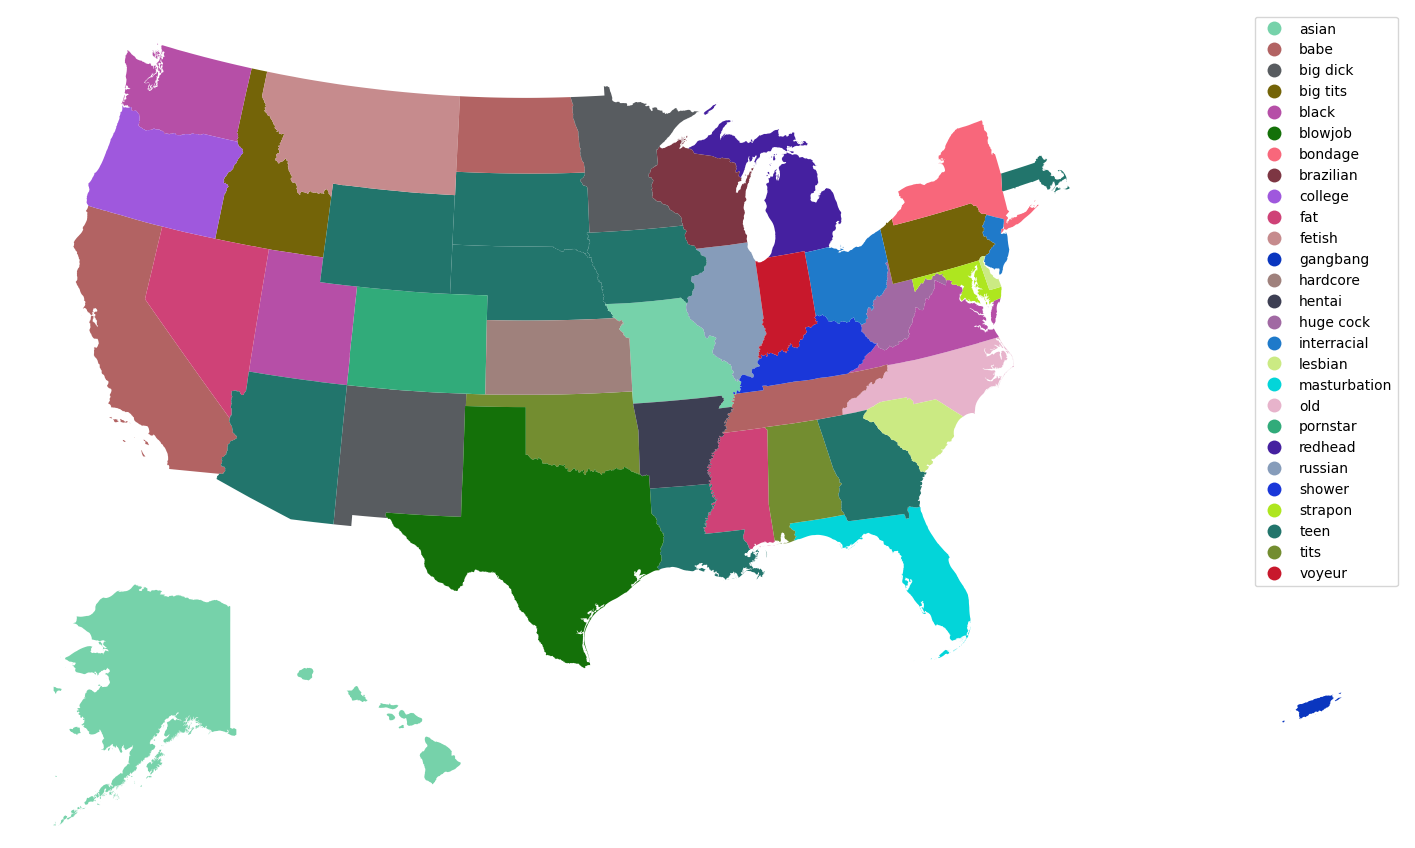

In [35]:
visframe = state_gdf.to_crs({'init':'epsg:2163'})

fig, ax = plt.subplots(1, figsize=(18, 14))
# remove the axis box from the main map
ax.axis('off')

visframe[~visframe.STATE.isin(['Hawaii','Alaska'])].plot('CATEGORY', ax=ax, legend=True, cmap=colors.ListedColormap(list(category_colors.values())))

# add Alaska
akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
akax.axis('off')
# polygon to clip western islands
polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
alaska_gdf = state_gdf[state_gdf['STATE']=='Alaska']
alaska_gdf.clip(polygon).plot('CATEGORY', ax=akax, cmap=colors.ListedColormap(list(category_colors.values())))

# add Hawaii
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])   
hiax.axis('off')
# polygon to clip western islands
hipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
hawaii_gdf = state_gdf[state_gdf['STATE']=='Hawaii']
hawaii_gdf.clip(hipolygon).plot('CATEGORY', ax=hiax, cmap=colors.ListedColormap(list(category_colors.values())))

plt.savefig('RESULTS/state_categories.png')